In [1]:
# Import statements

import pandas as pd
import numpy as np

from textblob import TextBlob
from textblob import Word


import spacy

from wordcloud import WordCloud, STOPWORDS

# import spacy.cli
# spacy.cli.download("en_core_web_lg")
# import scattertext as st

# https://github.com/RobertJGabriel/Google-profanity-words for the swear-o-meter help :o)

C:\Users\Pascal\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Pascal\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
%run tina-kenjee-comments-nlp-script.ipynb

all done?!


In [3]:
debate  = pd.read_csv("debate1_comments.csv")

In [4]:
debate.head()

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date
0,0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06
1,1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06
2,2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06
3,3,*HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...,Ugxq9QPgpnle1JXsdEd4AaABAg,http://www.youtube.com/channel/UCTyk38pQI-Jquy...,Nancy Carter,0,8,2020-12-06 19:27:23+00:00,0,2020-12-06
4,4,I think if they announced they had a vaccine b...,Ugw1IUddojUmkbmGq_N4AaABAg,http://www.youtube.com/channel/UCatDFXgDo9Y5pc...,Neal BlaBla,0,0,2020-12-06 19:19:33+00:00,0,2020-12-06


In [5]:
%run tina-kenjee-comments-nlp-script.ipynb
test_func()

all done?!
it works!! :o)


In [6]:
# debate['clean_comment'] = debate.comment.map(processRow)


In [7]:
debate['clean_comment'] = debate.comment.map(processRow) 

In [8]:
# debate.to_csv('cleaned_debate_comment')

In [9]:
debate.clean_comment

0                                      use word smart dyin
1        mental lmfao wow new height greatest nation world
2                        wanted lawrence donnell moderator
3        hotslut live tanta beyezas que dios hecho en e...
4             think announced vaccine election trump might
                               ...                        
54248                                                  lol
54249                                                trump
54250                                                   ok
54251                                    fuck donald trump
54252                                          heated lmao
Name: clean_comment, Length: 54253, dtype: object

In [10]:
swear_words = pd.read_csv('list_swear.txt', delimiter = "\n")
swear_words_set = set(swear_words['4r5e'])
swear_words_set.add('4r5e')
# swear_words_set

In [11]:
def swear_o_meter_detection(row):
    swear_o_meter=0
#     print(row)
    text = row.split()
    for i in text:
        if i in swear_words_set:
            swear_o_meter += 1
    
    return swear_o_meter
    

swear_o_meter_detection("stuff is fuck  bitch bad or good")


2

In [12]:
debate['swear_o_meter'] = debate['clean_comment'].map(swear_o_meter_detection)
debate['swear_o_meter'].unique()

array([ 0,  1,  3,  2,  5,  6,  4, 12,  9, 52, 11,  7, 20,  8],
      dtype=int64)

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(debate.comment[0])


# sentiment.polarity_scores(comments.comment[0])
# comments['vader_sentiment'] = comments.comment.apply(lambda x: sent.polarity_scores(x))
# comments['vader_neg_sentiment'] = comments.vader_sentiment.apply(lambda x: x['neg'])
# comments['vader_pos_sentiment'] = comments.vader_sentiment.apply(lambda x: x['pos'])
# comments['vader_comp_sentiment'] = comments.vader_sentiment.apply(lambda x: x['compound'])

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}

In [14]:
debate['vader_polarity'] = debate['clean_comment'].map(sentiment.polarity_scores)

In [15]:
debate.head()

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date,clean_comment,swear_o_meter,vader_polarity
0,0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06,use word smart dyin,0,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
1,1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06,mental lmfao wow new height greatest nation world,1,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp..."
2,2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06,wanted lawrence donnell moderator,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,*HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...,Ugxq9QPgpnle1JXsdEd4AaABAg,http://www.youtube.com/channel/UCTyk38pQI-Jquy...,Nancy Carter,0,8,2020-12-06 19:27:23+00:00,0,2020-12-06,hotslut live tanta beyezas que dios hecho en e...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,4,I think if they announced they had a vaccine b...,Ugw1IUddojUmkbmGq_N4AaABAg,http://www.youtube.com/channel/UCatDFXgDo9Y5pc...,Neal BlaBla,0,0,2020-12-06 19:19:33+00:00,0,2020-12-06,think announced vaccine election trump might,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [16]:
debate['vader_neg_sentiment'] = debate.vader_polarity.map(lambda x: x['neg'])
debate['vader_pos_sentiment'] = debate.vader_polarity.map(lambda x: x['pos'])
debate['vader_neu_sentiment'] = debate.vader_polarity.map(lambda x: x['neu'])
debate['vader_compound_sentiment'] = debate.vader_polarity.map(lambda x: x['compound'])

# comments['vader_pos_sentiment'] = comments.vader_sentiment.apply(lambda x: x['pos'])
# comments['vader_comp_sentiment'] = comments.vader_sentiment.apply(lambda x: x['compound'])

In [17]:
# debate['vader_neg_sentiment'].unique()

In [18]:
debate.sort_values(by=['vader_compound_sentiment'], ascending=False)[['comment','vader_compound_sentiment']].head(20)

,comment,vader_compound_sentiment
25426,FOR THE SALVATION OF SOULS!\n\nRead the materi...,0.9997
8586,Stop wasting your time and funds on scammers b...,0.9994
38599,God bless everyone here.\nIf you do not know t...,0.9986
22966,❤️❤️❤️The Beautiful Wife💓💓\n.\n. \nThe head of...,0.9984
19555,🌏STAND FOR ASSANGE\n\nUNITED WORLD WIDE WE HAV...,0.9981
22977,✊⚡📯👑📯⚡✊\n\nSpeaking over you with🔥Fire🔥of the ...,0.9979
8137,Nothing can compare with all that is ours in C...,0.9979
41374,"Wow, Chris had the hardest job tonight. monit...",0.9978
9014,"I AM THE GOD OF INVINCIBLE POWER, THE CREATOR ...",0.9977
27644,PRAYER OF PROTECCION FOR OUR MR. PRESIDENT DON...,0.9971


In [19]:
#### What's the overall swear-o-meter score? hum?
len(debate[debate.swear_o_meter !=0])/len(debate)  * 100

8.79582695887785

In [20]:
import gensim

C:\Users\Pascal\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [21]:
# dir(gensim)

In [22]:
import gensim
from gensim import corpora

In [23]:
temp = debate.clean_comment
all_debate = []
for i in temp:
#     print(i)
    sent = i.split()
    all_debate.append(sent)
#     print(sent)

# all_debate

In [24]:
dictionary = corpora.Dictionary(all_debate)

In [25]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_debate]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1)],
 [(16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 3),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1)],
 [(47, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(44, 1), (47, 1), (56, 1), (62, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(47, 1),
  (56, 1),
  (58, 1),
  (60, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 3)],
 [(44, 1), (74, 1), (75, 1)],
 [(76, 1), (77, 1), (78, 1)],
 [],
 [(79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86

In [26]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=5)

In [27]:
print(ldamodel.print_topics())

[(0, '0.055*"biden" + 0.053*"trump" + 0.038*"vote" + 0.023*"joe" + 0.014*"go" + 0.013*"win" + 0.010*"voting" + 0.009*"orange" + 0.009*"look" + 0.008*"people"'), (1, '0.022*"people" + 0.011*"president" + 0.011*"country" + 0.010*"america" + 0.008*"american" + 0.007*"one" + 0.007*"year" + 0.007*"world" + 0.007*"want" + 0.006*"get"'), (2, '0.113*"trump" + 0.071*"biden" + 0.023*"joe" + 0.020*"president" + 0.018*"wallace" + 0.017*"moderator" + 0.015*"like" + 0.014*"chris" + 0.012*"time" + 0.011*"let"'), (3, '0.034*"old" + 0.032*"god" + 0.016*"year" + 0.011*"jesus" + 0.011*"man" + 0.009*"tonight" + 0.009*"embarrassing" + 0.008*"wtf" + 0.008*"men" + 0.007*"mask"'), (4, '0.059*"debate" + 0.032*"like" + 0.023*"two" + 0.016*"show" + 0.012*"watching" + 0.012*"watch" + 0.011*"joke" + 0.010*"one" + 0.010*"presidential" + 0.010*"comment"')]


In [28]:
ldamodel.show_topics()

[(0,
  '0.055*"biden" + 0.053*"trump" + 0.038*"vote" + 0.023*"joe" + 0.014*"go" + 0.013*"win" + 0.010*"voting" + 0.009*"orange" + 0.009*"look" + 0.008*"people"'),
 (1,
  '0.022*"people" + 0.011*"president" + 0.011*"country" + 0.010*"america" + 0.008*"american" + 0.007*"one" + 0.007*"year" + 0.007*"world" + 0.007*"want" + 0.006*"get"'),
 (2,
  '0.113*"trump" + 0.071*"biden" + 0.023*"joe" + 0.020*"president" + 0.018*"wallace" + 0.017*"moderator" + 0.015*"like" + 0.014*"chris" + 0.012*"time" + 0.011*"let"'),
 (3,
  '0.034*"old" + 0.032*"god" + 0.016*"year" + 0.011*"jesus" + 0.011*"man" + 0.009*"tonight" + 0.009*"embarrassing" + 0.008*"wtf" + 0.008*"men" + 0.007*"mask"'),
 (4,
  '0.059*"debate" + 0.032*"like" + 0.023*"two" + 0.016*"show" + 0.012*"watching" + 0.012*"watch" + 0.011*"joke" + 0.010*"one" + 0.010*"presidential" + 0.010*"comment"')]

In [29]:
for i in debate.sort_values(by='vader_neg_sentiment',ascending=False)['comment'][:20]:
    print(i)

Terrible.
We’re fucked
so disgusting
What a goddamn embarrassment.
We.   Are.    All.     Fucked
what the fuck is nonsense
So embarrassing 🤦🏾‍♀️
This is just ridiculous
Damn, we’re fucked
Wtf is this? 😥😥😟☹.... We are in trouble
This is so sad.
You're all doomed
Lame.
Embarrassing
We're doomed
We are screwed.
We’re fucked
This is sick
U lied
Ridiculous


In [30]:
for i in debate.sort_values(by='vader_pos_sentiment',ascending=False)['comment'][:20]:
    print(i)

Haha
what a joke
Lmao
Yess
This has to be a joke
good
loved it ! :))
Wow... just... wow
Number 1 =Number 2= Number 3

And you are Number 2😂😂😂
Wow this is unbelievable
😂😂😂😂😂😂 hilarious
Lol.
lol
Wow
good.
Agree
Wow
Ok
@27:45 you’re welcome 😁
best comedy special of 2020


In [31]:
debate.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment'],
      dtype='object')

In [32]:
len(debate)

54253

In [33]:
len(debate['author_name'].unique())

42501

In [34]:
debate[debate['swear_o_meter']>0]['author_name'].nunique()

4433

In [35]:
debate[debate['swear_o_meter']==0]['author_name'].nunique()

39151

In [36]:
# debate[.columns]


In [37]:
for i in debate.sort_values(by='like_count',ascending='False')['comment'][:20]:
    print(i)

54:50 Did you use the word smart?
I Am DYIN
2 vs 1 .... 😒
Goodnight. This wasn’t a debate.
biden 1, dotard 0.
BLAME AMERIKA FIRST ! ! !
My ears hurt 😢
Support cause
https://www.youtube.com/channel/UCd20R5qnRGNSbEUGr92pXtA
not trump bringing up his dead son
Thankful we had the greatest modern President in charge during the greatest modern crisis ... President Trump’s leadership has been remarkable and the economy is now open and thriving in all Republican states.    Democrat governors are purposely destroying their cities in the hope they can blame Trump
Watch as our democracy fades into nothingness.
Democratic are hippocratic
the Moderator WAS A BIGGER JOKE , What an ASSHOLE **I can SEE HE Doesn't Wear the pants in His Family
trump need learn how works  a debate...is terrible ...power off the mic in the next debate
Screw tactical joe is falling apart up there
I’m not from US but it’s funny and sad to watch at the same time, they wouldn’t even let each other talk 🤦🏽‍♀️
My brain trying t

In [38]:
for i in debate.sort_values(by='reply_count',ascending='False')['comment'][:20]:
    print(i)

54:50 Did you use the word smart?
I Am DYIN
This was almost unbearable to watch. Hopefully on the next debate they will mute the mic of the candidate who isn't being questioned.
Ughhh if trump win i wil rent a murderer
Trump's rallies spread the virus but protesters don't? I guess we should all be protesting and we will be protected from the virus..wow...why didn't we think of that before?
This shit was funny as hell great content 😂
Remember what real debates looked like? https://youtu.be/gbrcRKqLSRw
Fuck trump and everyone who supports him! Interrupts Biden every 5 seconds acting like a fucking lil kid and doesn’t give a specific answer to a question they ask him Biden 2020
need a fact checker bruh
Never seen the likes this crazy for a democrat
Biden is a joke and a liar!!!!
This debate seems like a carbon copy of a South Park episode.
I also invite you to go to conventions of state.com and learn the Constitution of the United States the original one the one that is the size that will

In [39]:
authors = debate[['comment','author_name']].groupby('author_name')
authors = authors.agg(np.count_nonzero)
authors.columns = ['count_comment']
authors = authors.sort_values(by='count_comment',ascending=False)[:30]
authors

,count_comment
author_name,
Thomas Lopez,89
Crockett 36,64
manuka,61
kristina Sentance,58
Jason Whitman,51
Harvey Ibarra,48
Reee_kid2.0 8,44
Andrea Foster,34
A P R,30


In [40]:
temp_swear = debate[debate['swear_o_meter'] > 0 ]

authors_swear = temp_swear[['comment','author_name']].groupby('author_name')
authors_swear = authors_swear.agg(np.count_nonzero)
authors_swear.columns = ['count_comment']
authors_swear = authors_swear.sort_values(by='count_comment',ascending=False)[:20]

impolite_ppl = list(authors_swear.index)
impolite_ppl

['Tini Taufahema',
 'manuka',
 'Debra Williams',
 'Derek Boe',
 'Freddy Fazbear',
 'Mark Taylor',
 'Thomas Lopez',
 'Jacob Romero',
 'Вий Кащеев',
 'Cary Sontag',
 'Elizabeth Stevens',
 'johnzero223',
 'zheng ann',
 'Felipa Guzman',
 'Eunice Mobley',
 'xxitzkarmaxx',
 'Jenny Ward',
 'Durzio',
 'Butterfly Effect',
 'Ugorg']

In [41]:
debate.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment'],
      dtype='object')

In [42]:
deb = debate[['author_name','reply_count']].groupby('author_name')
deb = deb.agg([np.sum])
deb.columns = ['reply_count']
deb = deb.sort_values(by='reply_count',ascending=False)[:20]
deb

,reply_count
author_name,
Kelogish,492
Emily Barney,428
Dario Romero,396
N Nielsen,246
Julia - stop xxx content,232
Alexa's Photos & General,203
Darth Vader,177
CaptainHappen,173
dholl synth music,161


In [43]:
generate_disc_ppl = list(deb.index)
generate_disc_ppl

['Kelogish',
 'Emily Barney',
 'Dario Romero',
 'N Nielsen',
 'Julia - stop xxx content',
 "Alexa's Photos & General",
 'Darth Vader',
 'CaptainHappen',
 'dholl synth music',
 'Watson',
 'Z',
 'Laura Legends',
 'maddy larson',
 'Google это мусор.',
 'Q',
 'Sesses es',
 'Just another Gaster Blaster',
 'EZ_ JR',
 'TampaTec',
 'blish']

In [44]:
debate.reply_count.sum()

64428

In [45]:
debate.comment

0             54:50 Did you use the word smart?\nI Am DYIN
1        44:41 It is mental LMFAO  . Wow a new  height ...
2            I wanted Lawrence O'Donnell as the moderator.
3        *HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...
4        I think if they announced they had a vaccine b...
                               ...                        
54248                                                  LOL
54249                                           TRUMP 2020
54250                                                   Ok
54251                                    Fuck Donald Trump
54252                                          Heated lmao
Name: comment, Length: 54253, dtype: object

In [46]:
deb_comment = debate[['comment','reply_count']]
deb_comment = deb_comment.groupby('comment')
deb_comment = deb_comment.agg([np.sum])
deb_comment.columns = ['reply_count']
deb_comment
deb_comment = deb_comment.sort_values(by='reply_count',ascending=False)[:20]

In [47]:
debate.reply_count.sum()

64428

In [48]:
deb_comment

,reply_count
comment,
This Debate is hilarious as hell until you realize one of them will be president,492
Gordon Ramsey would be a much better moderator for the next debate.,481
"This isn't a presidential debate, this is an emergency meeting discussion in Among Us.",404
Why can’t they just shut off one of the mics when the other person is talking?!🤪,246
"I’m sorry, but high school debates are more professional than this presidential monstrosity.",206
Probably the worst debate in American history.,176
This was the worse Presidential debate in modern American history.,172
"Conclusion:\n1) Trump performed as expected.\n2) Biden was more coherent than expected.\n3) Wallace on paper was a good choice (relatively-neutral), but he lacked authority in his voice, and also seemed to spend a lot of time on 'progressive' talking points.\n4) It wasn't a debate anyway, either the candidates squabbled like schoolkids or they just repeated the same tired old statements we've heard a hundred times.\n5) the american voters who want to vote will have to try to ignore the candidate's personalities and just look at Trump's policies of the last 4 years, then look at Obama/Biden's policies of their last 4 years and decide which policies they prefer more. It's the only way to figure out how to fairly vote as these debates leave none the wiser.",161
Americans: We're doomed.\nNon-Americans: Best TV Show ever!,153


In [49]:
debate.columns


Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment'],
      dtype='object')

In [50]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [51]:
import string
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [52]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pascal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pascal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
##kmeans
# desc = debate['clean_comment'].values 
# vectorizer4 = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,3))
# X4 = vectorizer4.fit_transform(desc)
# words = vectorizer4.get_feature_names()

In [54]:
# wcss = []
# for i in range(1,10):
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#     kmeans.fit(X4)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,10),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.savefig('elbow.png')
# plt.show()

In [55]:
# test

In [56]:
from emoji import UNICODE_EMOJI
def is_emoji(s):
    count = 0
    for emoji in UNICODE_EMOJI:
        count += s.count(emoji)
       
    return count

In [57]:
is_emoji(debate.comment[22966])

33

In [58]:
debate.comment

0             54:50 Did you use the word smart?\nI Am DYIN
1        44:41 It is mental LMFAO  . Wow a new  height ...
2            I wanted Lawrence O'Donnell as the moderator.
3        *HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...
4        I think if they announced they had a vaccine b...
                               ...                        
54248                                                  LOL
54249                                           TRUMP 2020
54250                                                   Ok
54251                                    Fuck Donald Trump
54252                                          Heated lmao
Name: comment, Length: 54253, dtype: object

In [59]:
debate["emoji_count"] = debate['comment'].map(is_emoji)
debate["emoji_count"].nunique()

118

In [60]:
debate[['clean_comment','emoji_count']][40:50]

,clean_comment,emoji_count
40,video title two old men yelling,2
41,even american tea get dear lord,1
42,trump better cyuzuzo rosine channel,0
43,straight fact soon biden get office moving buh...,2
44,watch actually like biden better something wrong,2
45,trump made ventilator working vaccine guy amaz...,1
46,total chaos funny hell,0
47,biden election peace,1
48,poor moderater,0
49,debate sparring match,1


In [61]:
debate.comment[40]

'The video title should be " Two Old Men Yelling at Each Other"😂😂'

In [62]:

debate.to_csv("debate09082021.csv")

In [63]:
test = debate.drop('Unnamed: 0',axis=1)
test.columns

Index(['comment', 'comment_id', 'author_url', 'author_name', 'reply_count',
       'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count'],
      dtype='object')

In [64]:
trump_check  = debate[debate.clean_comment.str.contains('trump')]

In [65]:
def trump_count(row):
    count = 0
    for i in list(row):
        if(i == 'trump'):
            count = count+1
    return count

In [66]:
debate['is_trump'] = debate.comment.str.contains('trump')
debate['is_biden'] = debate.comment.str.contains('biden')



In [67]:
print(len(debate[debate['is_trump']==True]))
print(len(debate[debate['is_biden']==True]))

4222
1795


In [68]:
#  debate.comment.str.contains('biden')

In [69]:
debate.to_csv('debate09082021_2')

In [70]:
from textblob import TextBlob
from textblob import Word

In [71]:
debate['is_president'] = debate.comment.str.contains('president')

In [72]:
debate[debate.is_president]

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date,...,swear_o_meter,vader_polarity,vader_neg_sentiment,vader_pos_sentiment,vader_neu_sentiment,vader_compound_sentiment,emoji_count,is_trump,is_biden,is_president
8,8,Fun fact: Biden is NOT the president and this ...,UgyJgmetyeFt0-yO59J4AaABAg,http://www.youtube.com/channel/UCCHvvG5zoIxZ_f...,Bianca Randle,0,0,2020-12-06 08:14:28+00:00,0,2020-12-06,...,0,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.000,0.320,0.680,0.5106,4,False,False,True
50,50,I hear the next presidential debate will have ...,UgzDsM5ijBlg21fehfl4AaABAg,http://www.youtube.com/channel/UCOrp5xE4nxPv9Y...,Chris Lagos,0,0,2020-12-02 18:43:54+00:00,0,2020-12-02,...,0,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.000,0.110,0.890,0.1531,5,False,False,True
83,83,How the hell did this orange clown become pres...,Ugxk1LHxAvAAd4jiMNh4AaABAg,http://www.youtube.com/channel/UClS8MB9Jv_awaL...,Noel LFY Gaming,0,1,2020-11-30 12:56:49+00:00,0,2020-11-30,...,1,"{'neg': 0.194, 'neu': 0.421, 'pos': 0.385, 'co...",0.194,0.385,0.421,0.5509,5,False,False,True
92,92,Imagine if those people would run for presiden...,UgwCL7G-3gvNDHrPE354AaABAg,http://www.youtube.com/channel/UCtwgOUi66yIvZv...,Japan_Lover 007,0,0,2020-11-29 18:37:14+00:00,0,2020-11-29,...,0,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",0.412,0.000,0.588,-0.6369,2,False,False,True
115,115,what in the hell is this bafoon laughing about...,UgyKEshlkrNUum2kam54AaABAg,http://www.youtube.com/channel/UCpAqZAl1eM_tSq...,Peace Love,0,0,2020-11-27 18:35:27+00:00,0,2020-11-27,...,2,"{'neg': 0.396, 'neu': 0.311, 'pos': 0.293, 'co...",0.396,0.293,0.311,-0.7443,10,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54113,54113,The president dismantled Biden. It’s hard to l...,UgygbAU7cZDZADg1PZ14AaABAg,http://www.youtube.com/channel/UCe5umOQugfK89Z...,Masta Katz,1,17,2020-09-30 02:48:00+00:00,1,2020-09-30,...,0,"{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp...",0.123,0.000,0.877,-0.1027,6,False,False,True
54153,54153,The worst presidential debate ever! The presid...,Ugwe5gPbhpVHvCrir3J4AaABAg,http://www.youtube.com/channel/UCVDwkLcXhlH_H3...,xïøñ 10th,50,117,2020-09-30 02:47:20+00:00,50,2020-09-30,...,0,"{'neg': 0.224, 'neu': 0.546, 'pos': 0.23, 'com...",0.224,0.230,0.546,-0.2263,4,False,False,True
54155,54155,Trump is easily the most childish president ev...,Ugz2alY3EMuZmYQ__DN4AaABAg,http://www.youtube.com/channel/UC15Omlazkf3tFm...,Brother Malcolm,19,112,2020-09-30 02:47:18+00:00,19,2020-09-30,...,0,"{'neg': 0.256, 'neu': 0.465, 'pos': 0.279, 'co...",0.256,0.279,0.465,0.0516,2,False,False,True
54166,54166,I am 100% Trump supporter. I thought Biden hel...,UgxTYFjmAzOfaeDBJ_x4AaABAg,http://www.youtube.com/channel/UCWYB7oWQRKptj4...,Mobius,3,2,2020-09-30 02:47:04+00:00,3,2020-09-30,...,0,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",0.000,0.347,0.653,0.7096,3,False,False,True


In [73]:
debate.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count', 'is_trump', 'is_biden',
       'is_president'],
      dtype='object')

In [74]:
# debate.drop(['Joe_Biden_count','trump'],axis=1,inplace=True)

In [75]:
debate.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count', 'is_trump', 'is_biden',
       'is_president'],
      dtype='object')

In [76]:
ldamodel.show_topics()

[(0,
  '0.055*"biden" + 0.053*"trump" + 0.038*"vote" + 0.023*"joe" + 0.014*"go" + 0.013*"win" + 0.010*"voting" + 0.009*"orange" + 0.009*"look" + 0.008*"people"'),
 (1,
  '0.022*"people" + 0.011*"president" + 0.011*"country" + 0.010*"america" + 0.008*"american" + 0.007*"one" + 0.007*"year" + 0.007*"world" + 0.007*"want" + 0.006*"get"'),
 (2,
  '0.113*"trump" + 0.071*"biden" + 0.023*"joe" + 0.020*"president" + 0.018*"wallace" + 0.017*"moderator" + 0.015*"like" + 0.014*"chris" + 0.012*"time" + 0.011*"let"'),
 (3,
  '0.034*"old" + 0.032*"god" + 0.016*"year" + 0.011*"jesus" + 0.011*"man" + 0.009*"tonight" + 0.009*"embarrassing" + 0.008*"wtf" + 0.008*"men" + 0.007*"mask"'),
 (4,
  '0.059*"debate" + 0.032*"like" + 0.023*"two" + 0.016*"show" + 0.012*"watching" + 0.012*"watch" + 0.011*"joke" + 0.010*"one" + 0.010*"presidential" + 0.010*"comment"')]

In [77]:
debate

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date,...,swear_o_meter,vader_polarity,vader_neg_sentiment,vader_pos_sentiment,vader_neu_sentiment,vader_compound_sentiment,emoji_count,is_trump,is_biden,is_president
0,0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06,...,0,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.000,0.474,0.526,0.4019,0,False,False,False
1,1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06,...,1,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,0.303,0.9100,2,False,False,False
2,2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06,...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,False,False,False
3,3,*HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...,Ugxq9QPgpnle1JXsdEd4AaABAg,http://www.youtube.com/channel/UCTyk38pQI-Jquy...,Nancy Carter,0,8,2020-12-06 19:27:23+00:00,0,2020-12-06,...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,False,False,False
4,4,I think if they announced they had a vaccine b...,Ugw1IUddojUmkbmGq_N4AaABAg,http://www.youtube.com/channel/UCatDFXgDo9Y5pc...,Neal BlaBla,0,0,2020-12-06 19:19:33+00:00,0,2020-12-06,...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,54248,LOL,UgyGoF2DkgGTxDerQIV4AaABAg,http://www.youtube.com/channel/UCanqfcbsOoZckd...,Shania Henry,0,1,2020-09-30 02:45:46+00:00,0,2020-09-30,...,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.4215,0,False,False,False
54249,54249,TRUMP 2020,UgzaizXS-uoLxE8-s0B4AaABAg,http://www.youtube.com/channel/UCV7H70qGv6F2u8...,bronzekneecap,0,5,2020-09-30 02:45:45+00:00,0,2020-09-30,...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,False,False,False
54250,54250,Ok,Ugx-QMo5tcb1UWRwsM54AaABAg,http://www.youtube.com/channel/UCUzdUB_XOeo-Yj...,John McCourt,0,0,2020-09-30 02:45:43+00:00,0,2020-09-30,...,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.2960,0,False,False,False
54251,54251,Fuck Donald Trump,Ugye-q_V4hXmMD-Jem14AaABAg,http://www.youtube.com/channel/UCnT2HYPgYLihLt...,Victorino Rodriguez,1,2,2020-09-30 02:45:41+00:00,1,2020-09-30,...,1,"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.000,0.364,-0.5423,0,False,False,False


In [78]:
debate.to_csv('debate09082021_3')

In [79]:
debate.drop('Unnamed: 0',axis=1,inplace=True)

In [80]:
debate

,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date,clean_comment,swear_o_meter,vader_polarity,vader_neg_sentiment,vader_pos_sentiment,vader_neu_sentiment,vader_compound_sentiment,emoji_count,is_trump,is_biden,is_president
0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06,use word smart dyin,0,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.000,0.474,0.526,0.4019,0,False,False,False
1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06,mental lmfao wow new height greatest nation world,1,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,0.303,0.9100,2,False,False,False
2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06,wanted lawrence donnell moderator,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,False,False,False
3,*HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...,Ugxq9QPgpnle1JXsdEd4AaABAg,http://www.youtube.com/channel/UCTyk38pQI-Jquy...,Nancy Carter,0,8,2020-12-06 19:27:23+00:00,0,2020-12-06,hotslut live tanta beyezas que dios hecho en e...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,False,False,False
4,I think if they announced they had a vaccine b...,Ugw1IUddojUmkbmGq_N4AaABAg,http://www.youtube.com/channel/UCatDFXgDo9Y5pc...,Neal BlaBla,0,0,2020-12-06 19:19:33+00:00,0,2020-12-06,think announced vaccine election trump might,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,LOL,UgyGoF2DkgGTxDerQIV4AaABAg,http://www.youtube.com/channel/UCanqfcbsOoZckd...,Shania Henry,0,1,2020-09-30 02:45:46+00:00,0,2020-09-30,lol,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.4215,0,False,False,False
54249,TRUMP 2020,UgzaizXS-uoLxE8-s0B4AaABAg,http://www.youtube.com/channel/UCV7H70qGv6F2u8...,bronzekneecap,0,5,2020-09-30 02:45:45+00:00,0,2020-09-30,trump,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,False,False,False
54250,Ok,Ugx-QMo5tcb1UWRwsM54AaABAg,http://www.youtube.com/channel/UCUzdUB_XOeo-Yj...,John McCourt,0,0,2020-09-30 02:45:43+00:00,0,2020-09-30,ok,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.2960,0,False,False,False
54251,Fuck Donald Trump,Ugye-q_V4hXmMD-Jem14AaABAg,http://www.youtube.com/channel/UCnT2HYPgYLihLt...,Victorino Rodriguez,1,2,2020-09-30 02:45:41+00:00,1,2020-09-30,fuck donald trump,1,"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.000,0.364,-0.5423,0,False,False,False


In [81]:
debate['is_trump'] = debate.comment.str.contains('trump')

In [82]:
debate["is_trump"] = debate["is_trump"].map(lambda x: int(x == True))
debate["is_biden"] = debate["is_biden"].map(lambda x: int(x == True))
debate["is_president"] = debate["is_president"].map(lambda x: int(x == True))


In [83]:
debate

,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date,clean_comment,swear_o_meter,vader_polarity,vader_neg_sentiment,vader_pos_sentiment,vader_neu_sentiment,vader_compound_sentiment,emoji_count,is_trump,is_biden,is_president
0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06,use word smart dyin,0,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.000,0.474,0.526,0.4019,0,0,0,0
1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06,mental lmfao wow new height greatest nation world,1,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,0.303,0.9100,2,0,0,0
2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06,wanted lawrence donnell moderator,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,0,0,0
3,*HOTSLUT.LIVE*\n\n\nみゃあこさん！ฅ( ̳• ·̫ • ̳ฅ)ﾆｬﾝ\n...,Ugxq9QPgpnle1JXsdEd4AaABAg,http://www.youtube.com/channel/UCTyk38pQI-Jquy...,Nancy Carter,0,8,2020-12-06 19:27:23+00:00,0,2020-12-06,hotslut live tanta beyezas que dios hecho en e...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,1,0,0,0
4,I think if they announced they had a vaccine b...,Ugw1IUddojUmkbmGq_N4AaABAg,http://www.youtube.com/channel/UCatDFXgDo9Y5pc...,Neal BlaBla,0,0,2020-12-06 19:19:33+00:00,0,2020-12-06,think announced vaccine election trump might,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54248,LOL,UgyGoF2DkgGTxDerQIV4AaABAg,http://www.youtube.com/channel/UCanqfcbsOoZckd...,Shania Henry,0,1,2020-09-30 02:45:46+00:00,0,2020-09-30,lol,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.4215,0,0,0,0
54249,TRUMP 2020,UgzaizXS-uoLxE8-s0B4AaABAg,http://www.youtube.com/channel/UCV7H70qGv6F2u8...,bronzekneecap,0,5,2020-09-30 02:45:45+00:00,0,2020-09-30,trump,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,0,0,0,0
54250,Ok,Ugx-QMo5tcb1UWRwsM54AaABAg,http://www.youtube.com/channel/UCUzdUB_XOeo-Yj...,John McCourt,0,0,2020-09-30 02:45:43+00:00,0,2020-09-30,ok,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,1.000,0.000,0.2960,0,0,0,0
54251,Fuck Donald Trump,Ugye-q_V4hXmMD-Jem14AaABAg,http://www.youtube.com/channel/UCnT2HYPgYLihLt...,Victorino Rodriguez,1,2,2020-09-30 02:45:41+00:00,1,2020-09-30,fuck donald trump,1,"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.000,0.364,-0.5423,0,0,0,0


In [84]:
debate.to_csv('debate09082021_4')

In [85]:
debate.columns

Index(['comment', 'comment_id', 'author_url', 'author_name', 'reply_count',
       'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count', 'is_trump', 'is_biden',
       'is_president'],
      dtype='object')

In [86]:
kmeans_debate = debate[[ 'reply_count', 'like_count',  'total_reply_counts', 'swear_o_meter', 
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count', 'is_trump', 'is_biden',
       'is_president']]

In [87]:
kmeans_debate.dtypes

reply_count                   int64
like_count                    int64
total_reply_counts            int64
swear_o_meter                 int64
vader_neg_sentiment         float64
vader_pos_sentiment         float64
vader_neu_sentiment         float64
vader_compound_sentiment    float64
emoji_count                   int64
is_trump                      int64
is_biden                      int64
is_president                  int64
dtype: object

In [88]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

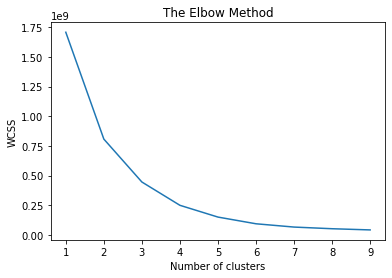

In [89]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(kmeans_debate)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(kmeans_debate)

KMeans(n_clusters=5, random_state=0)

In [91]:
debate['Kmeans'] = kmeans.labels_

In [92]:
debate.Kmeans.value_counts()

0    53476
4      727
3       42
1        6
2        2
Name: Kmeans, dtype: int64

In [93]:
oultliers_debate = debate[debate.Kmeans==4]
print("swear o meter outlier group")
print(oultliers_debate['swear_o_meter'].mean())
print("trump count")
print(oultliers_debate['is_trump'].sum()/len(oultliers_debate)*100)
print("Biden count")
print(oultliers_debate['is_biden'].sum()/len(oultliers_debate)*100)
print("vader positive")
print(oultliers_debate['vader_pos_sentiment'].sum()/len(oultliers_debate)*100)
print("vader negative")
print(oultliers_debate['vader_neg_sentiment'].sum()/len(oultliers_debate)*100)
print('total replies')
print(oultliers_debate['total_reply_counts'].sum())
print('total messages')
print(len(oultliers_debate))

swear o meter outlier group
0.037138927097661624
trump count
3.7138927097661623
Biden count
1.3755158184319118
vader positive
18.82310866574966
vader negative
14.859972489683631
total replies
15808
total messages
727


In [94]:
main_debate  = debate[debate.Kmeans==0]
print("swear o meter main group")
print(main_debate['swear_o_meter'].mean())
print("trump count")
print(main_debate['is_trump'].sum()/len(main_debate)*100)
print("biden count")
print(main_debate['is_biden'].sum()/len(main_debate)*100)
print("vader positive")
print(main_debate['vader_pos_sentiment'].sum()/len(main_debate)*100)
print("vader negative")
print(main_debate['vader_neg_sentiment'].sum()/len(main_debate)*100)

print('total replies')
print(main_debate['total_reply_counts'].sum())
print('total messages')
print(len(main_debate))

swear o meter main group
0.11036726755927893
trump count
7.8446405864312965
biden count
3.3360759967088036
vader positive
18.029080335103597
vader negative
16.451497868202562
total replies
43665
total messages
53476


In [95]:
debate.columns

Index(['comment', 'comment_id', 'author_url', 'author_name', 'reply_count',
       'like_count', 'date', 'total_reply_counts', 'just_date',
       'clean_comment', 'swear_o_meter', 'vader_polarity',
       'vader_neg_sentiment', 'vader_pos_sentiment', 'vader_neu_sentiment',
       'vader_compound_sentiment', 'emoji_count', 'is_trump', 'is_biden',
       'is_president', 'Kmeans'],
      dtype='object')

In [96]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [97]:
sentences = debate['comment']
w2v_model.build_vocab(sentences, progress_per=10000)

In [98]:
def get_stop_words(type="stopwordslib"):
    more_stopwords = set(['t','dtypes','n','dtype','v','wo','s','object'])

    my_stop =  set(STOPWORDS)
    my_stop = my_stop.union( more_stopwords)
    
    return my_stop

more_stopwords = get_stop_words()
# more_stopwords

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def print_wordcloud(text_data,stop_word=None):
    mpl.rcParams['figure.figsize']=(15,9)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 

    if(stop_word == None):
        print("Is none")
        stopwords = set(STOPWORDS)
    else:
        print("Custom stop word sent to function")
        stopwords = stop_word
        
    wordcloud = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              max_words=200,
                              max_font_size=40, 
                              random_state=42
                             ).generate(str(text_data))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    fig.savefig("word1.png", dpi=900)
    
    return wordcloud

Custom stop word sent to function


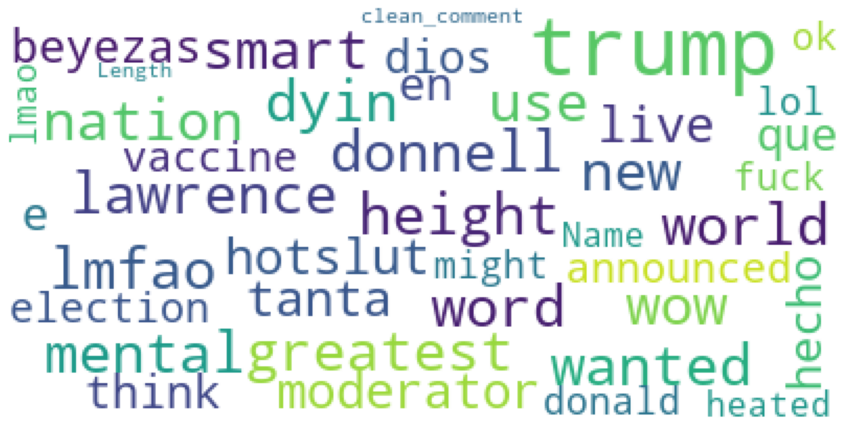

In [100]:
print_wordcloud(debate['clean_comment'],stop_word=more_stopwords)

Custom stop word sent to function


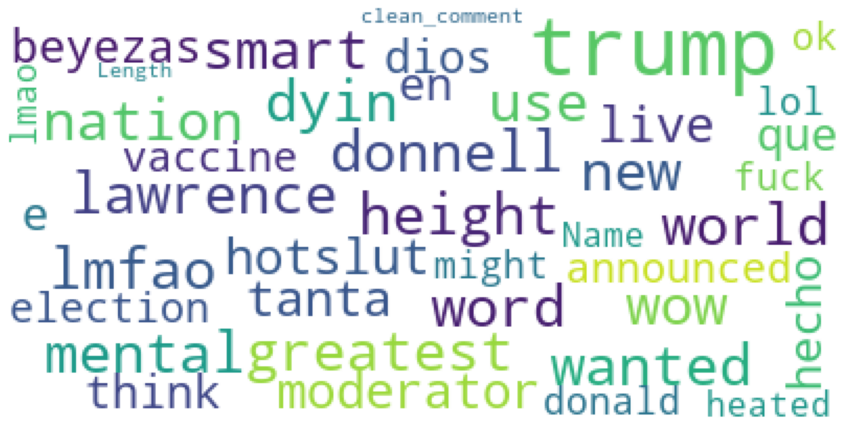

In [101]:
print_wordcloud(debate[debate.Kmeans==0]['clean_comment'],stop_word=more_stopwords)

In [102]:
# print_wordcloud(debate[debate.Kmeans=='4']['clean_comment'])

Custom stop word sent to function


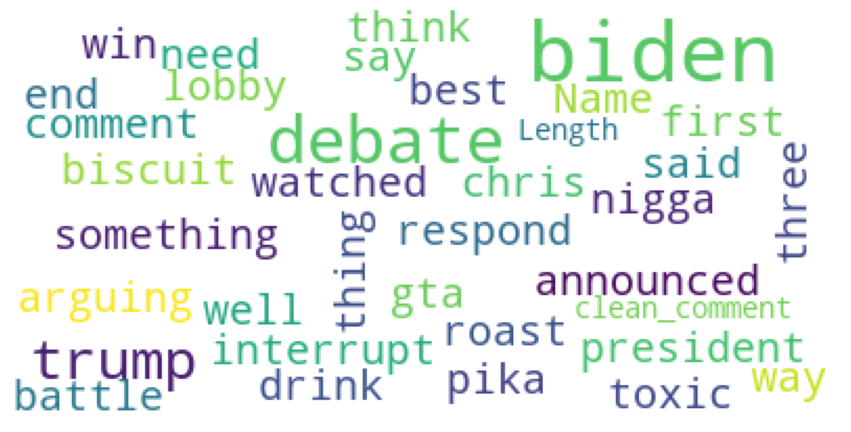

In [103]:
print_wordcloud( debate[debate.Kmeans==4]['clean_comment'],stop_word=more_stopwords)

In [104]:
debate.to_csv("debate10082021-1.csv")

In [105]:
import spacy
import scattertext as st
from pprint import pprint
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

In [106]:
nlp = spacy.load("en_core_web_sm")
from whatlies import Embedding, EmbeddingSet
from whatlies.language import FasttextLanguage

In [107]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in debate['clean_comment']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)

sentences = bigram[sent]

In [108]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)


29441

In [109]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['trump',
 'biden',
 'debate',
 'joe',
 'people',
 'like',
 'president',
 'one',
 'vote',
 'moderator']

In [110]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

In [111]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [112]:
?Word2Vec

In [113]:
w2v_model.build_vocab(sentences, progress_per=10000)

In [114]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(6238452, 16622640)

In [115]:
w2v_model.init_sims(replace=True)

<ipython-input-115-c7757d71a30b>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [116]:
w2v_model.wv.most_similar(negative=["trump"])

[('movie', 0.24975760281085968),
 ('netflix', 0.2363646924495697),
 ('remote', 0.21924622356891632),
 ('version', 0.21430827677249908),
 ('hollywood', 0.20919813215732574),
 ('page', 0.2064381241798401),
 ('reality', 0.2060307413339615),
 ('club', 0.19780084490776062),
 ('living', 0.19734928011894226),
 ('grumpy_old', 0.19576328992843628)]

In [117]:
w2v_model.wv.most_similar(negative=["biden"])

[('live', 0.26321646571159363),
 ('living', 0.26226529479026794),
 ('planet', 0.26155364513397217),
 ('cold', 0.24161052703857422),
 ('quality', 0.22610171139240265),
 ('hollywood', 0.22603970766067505),
 ('music', 0.21620596945285797),
 ('canadian', 0.210577592253685),
 ('netflix', 0.20925849676132202),
 ('drama', 0.20283785462379456)]

In [118]:
# w2v_model.wv.most_similar(positive=["joe biden"])

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [120]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
#     print(arrays)
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=21
                ,svd_solver='full').fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

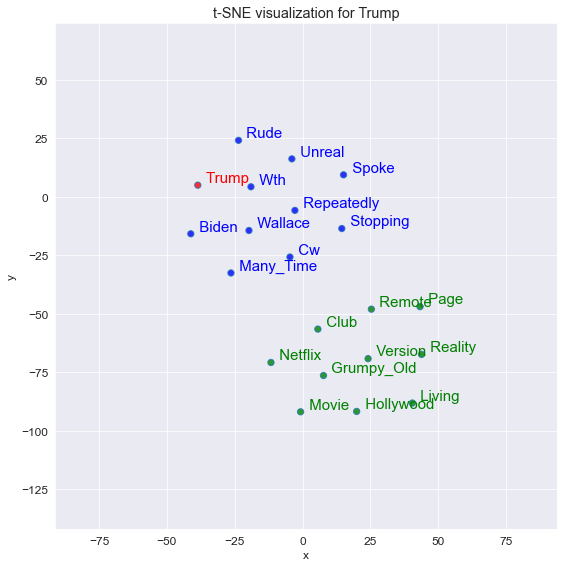

In [131]:
tsnescatterplot(w2v_model, 'trump', [i[0] for i in w2v_model.wv.most_similar(negative=["trump"])])

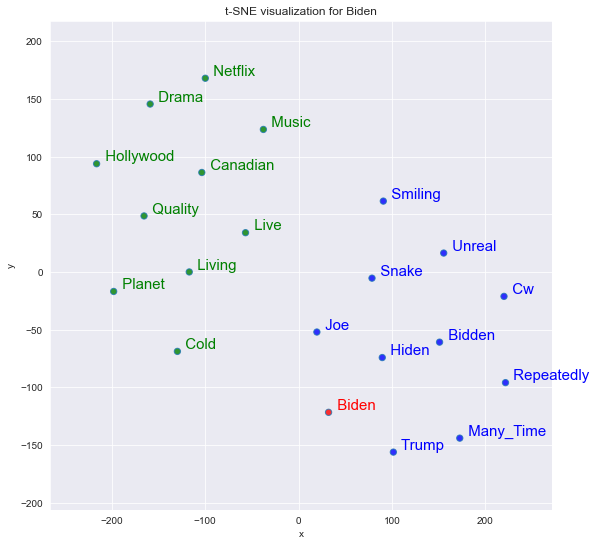

In [122]:
tsnescatterplot(w2v_model, 'biden', [i[0] for i in w2v_model.wv.most_similar(negative=["biden"])])

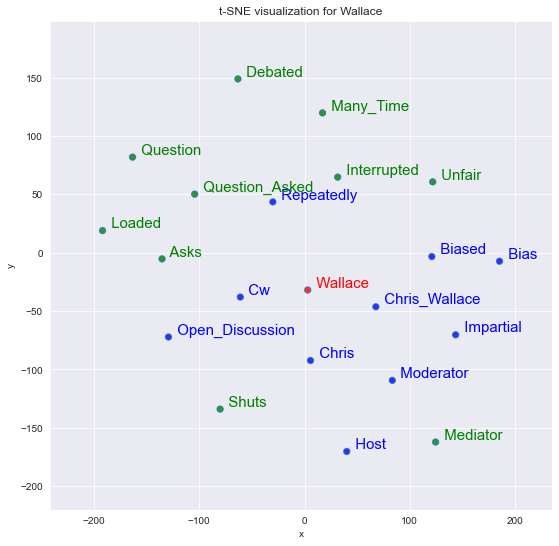

In [123]:
tsnescatterplot(w2v_model, "wallace", [t[0] for t in w2v_model.wv.most_similar(positive=["wallace"], topn=20)][10:])

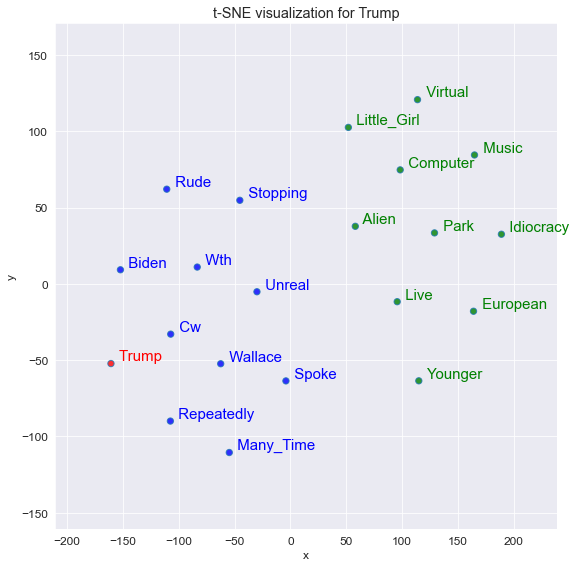

In [130]:
tsnescatterplot(w2v_model, "trump", [t[0] for t in w2v_model.wv.most_similar(negative=["trump"], topn=20)][10:])

Custom stop word sent to function


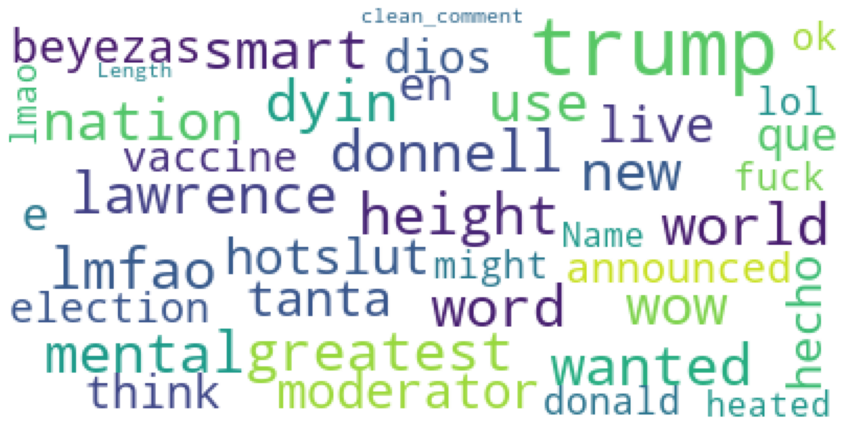

In [124]:
print_wordcloud( debate['clean_comment'],stop_word=more_stopwords)

In [125]:
debate.to_csv("final_debate.csv")